<a href="https://colab.research.google.com/github/techllen/AI_ML_projects/blob/main/IMDB_Movie_Chatbot/Allen_Mwita_IMDB_Movie_Chatbot_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color='56c3ea'><h1><b>Name : Allen Matare Mwita<b></h1></font>

<font color='56c3ea'><h1><b>Uplevel email address : allenmwita21@gmail.com<b></h1></font>

<font color='56c3ea'><h1><b>Problem Statement Name : IMDB_Movie_Chatbot<b></h1></font>

<font color='56c3ea'><h1><b>IMBD Movie Chatbot<b></h1></font>

<font color='56c3ea'><h1><b>1 Business Background and Problem Statement<b></h1></font>

<font color='56c3ea'><h1><b>1.1 Business Background<b></h1></font>



The entertainment industry has seen a surge in demand for intelligent recommendation systems and conversational AI tools. Movie enthusiasts often search for recommendations, plot summaries, actor details, and genre-specific films. However, navigating vast databases like IMDb manually can be time-consuming and overwhelming.

IMDb stands for Internet Movie Database an online database of information related to films, television series, podcasts, home videos, video games, and streaming content online including cast, production crew and personal biographies, plot summaries, trivia, ratings, and fan and critical reviews.

For more information https://en.wikipedia.org/wiki/IMDb

<font color='56c3ea'><h1><b>1.2 Problem Statement<b></h1></font>

Current searching involves

- Manual Search: Users rely on IMDb, Rotten Tomatoes, and Wikipedia, which require keyword-based searches.
- Generic Recommendations: Streaming services suggest movies but lack interactive engagement.
- Limited Personalization: Existing platforms provide static recommendations without contextual understanding.


<font color='Green'><h1><b>Problem statement Understanding<b></h1></font>
- Overall besiness needs to move away from traditional manual apporaches and embrace modern approaches to enhance user experience by providing them with enriched results as well as enhancing their follow up questions

<font color='56c3ea'><h1><b>1.3 Objectives<b></h1></font>

With the main objective to reduce manual searches and provide contextual responses , the following are key objectives

- Interactive Movie Search: Allow users to search for movies based on genre, actors, plot summaries, or reviews through natural conversation.
- Personalized Movie Recommendations: Suggest movies based on user preferences and previous interactions.
- Enhanced User Experience: Provide instant responses with insights such as ratings, reviews, and movie details.

<font color='56c3ea'><h1><b>1.4 Tchnical Approach to the porblem statement<b></h1></font>

Due to above challenges a AI-Powered Assistant/Movie Chatbot can be built to bridge this gap by leveraging Natural Language Processing (NLP) and Large Language Models (LLMs) to provide an interactive, conversational way to explore movie data.

The goal is to build a chatbot that understands natural language queries and retrieves relevant movie information from an IMDb dataset. The chatbot should:

- Process user inputs conversationally.
- Retrieve and display relevant movie details.
- Handle follow-up questions and refine responses dynamically.

<font color='56c3ea'><h1><b>2 Dataset Overview<b></h1></font>

<font color='56c3ea'><h1><b>2.1 Data Understanding<b></h1></font>

IMBD database provided has a lot of data. The dataset provided for this problem has 10 different features/column and they present different things as in below table


| Column Name        | Description                                                                                     |
|--------------------|------------------------------------------------------------------------------------------------|
| Title             | The name of the movie. *(String)*                                                               |
| IMDb Rating       | The average audience rating. *(Float)*                                                          |
| Year             | The release year of the movie. *(Integer)*                                                       |
| Certificates      | The movie's age rating (e.g., PG, PG-13, R). *(String)*                                         |
| Genre            | The primary category of the movie (e.g., Adventure, Biography, Documentary). *(String)*          |
| Director         | The name of the movie's director. *(String)*                                                     |
| Star Cast        | Key actors featured in the movie. *(String)*                                                     |
| MetaScore        | The movie's Metacritic score-summarized professional opinion on the quality of a movie,usually contrasted with audience rating. *(Float)*                                                          |
| Poster-src       | The URL for the movie's poster image. *(String)*                                                 |
| Duration        | The total runtime of the movie in minutes. *(Float)*                                              |


<font color='56c3ea'><h1><b>2.2  Necessary Imports and dataset observation<b></h1></font>

In [1]:
# INSTALLING REQUIRED LIBRARIES

# Installing the LangChain Hub package to access and manage pre-built AI chains, prompts, and agents.
!pip install langchainhub --quiet

# Installing the LangChain OpenAI integration to use OpenAI models within LangChain workflows.
!pip install langchain-openai --quiet

# Installing the core LangChain library for building LLM-based applications, including chaining, memory, and retrieval capabilities.
!pip install langchain --quiet

# Installing the community version of LangChain, which includes integrations and tools contributed by the community.
!pip install langchain-community --quiet

# Installing FAISS (Facebook AI Similarity Search) for efficient similarity-based search on text embeddings.
!pip install faiss-cpu --quiet

# Installing Gradio, a framework to create web-based UIs for AI models and applications easily.
!pip install gradio --quiet

# Installing langsmith for evaluation and performance
!pip install -U langsmith openai --quiet

# Installing beautifulsoup4 for accessing internet
!pip install requests beautifulsoup4 --quiet

# Intalling langgraph for AI agent workflow
!pip install langgraph langchain openai --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 49.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 131.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 680.9/680.9 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5

In [2]:
# Importing the OpenAI library to interact with OpenAI's API services.
from openai import OpenAI

# Importing the KaggleHub library to interact with datasets and models available on Kaggle.
import kagglehub

# Importing the CSV module for reading and writing CSV files.
import csv

# Importing pandas for data manipulation and analysis.
import pandas as pd

# Importing numpy for numerical operations and handling arrays efficiently.
import numpy as np

# Importing os to interact with the operating system, such as environment variables and file paths.
import os

# Importing getpass to securely handle user input (e.g., API keys or passwords).
import getpass

# Importing libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Importing TfidfVectorizer to identify the most important keywords in your text data for keyword trends
from sklearn.feature_extraction.text import TfidfVectorizer

# Importing RecursiveCharacterTextSplitter from LangChain for chunking large text into smaller, manageable pieces.
# This helps in optimizing text for processing and retrieval.
from langchain_text_splitters import RecursiveCharacterTextSplitter

# Importing OpenAIEmbeddings from LangChain to generate numerical vector representations (embeddings) of text.
# These embeddings capture the semantic meaning of the text for efficient similarity searches.
from langchain_openai import OpenAIEmbeddings

# Importing FAISS (Facebook AI Similarity Search) from LangChain's community package.
# FAISS is used for storing and retrieving embeddings efficiently by finding similar vectors.
from langchain_community.vectorstores import FAISS

# Importing ChatOpenAI from LangChain to interact with OpenAI's language models, such as GPT, for generating responses.
from langchain_openai import ChatOpenAI

# Importing ChatPromptTemplate to create structured prompts for the chatbot, ensuring consistent interactions with the AI model.
from langchain_core.prompts import ChatPromptTemplate

# Importing ChatPromptTemplate again (duplicate import, should be removed to avoid redundancy).
from langchain_core.prompts import ChatPromptTemplate

# Importing create_stuff_documents_chain to combine and process retrieved documents for meaningful AI-generated responses.
from langchain.chains.combine_documents import create_stuff_documents_chain

# Importing create_retrieval_chain to build a chain that retrieves relevant documents from a vector store and generates AI responses.
from langchain.chains import create_retrieval_chain

# Importing StrOutputParser from LangChain to parse the output
from langchain_core.output_parsers import StrOutputParser

# Importing the Gradio library to create a simple web-based user interface
import gradio as gr

# Importing client from langsmith for uploading datasets to langsmith
from langsmith import Client

# Import the 'render_text_description' function from LangChain's 'tools.render' module
# to generate a textual description of the given tools for the LLM
from langchain.tools.render import render_text_description

# Import itemgetter from the operator module
# whisch allows extracting specific keys from a dictionary (used here for extracting "arguments")
from operator import itemgetter

# Import the 'tool' decorator from LangChain Core
# This decorator allows defining functions as LangChain tools that can be invoked programmatically
from langchain_core.tools import tool

# Import RunnablePassthrough from LangChain Core
# This is used to pass data through a pipeline without modification,
# while also allowing additional processing or assignments.
from langchain_core.runnables import RunnablePassthrough

# Import beautiful soap for retrieving internet results
import requests
from bs4 import BeautifulSoup

# Import json for parsing json content
import json

# Importing JsonOutputParser for porcessing json contents
from langchain_core.output_parsers import JsonOutputParser

<font color='56c3ea'><h1><b>2.2.1 Loading the data<b></h1></font>

In [3]:
# Mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load the data
IMDB_Movies_df = pd.read_csv("/content/drive/MyDrive/AI_ML/datasets/IMDB_Movie_Chatbot_Dataset/IMDb_Dataset.csv")

In [5]:
# Viewing tha data
IMDB_Movies_df.head()

,Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Poster-src,Duration (minutes)
0,End of the Spear,6.8,2005,PG-13,Adventure,Jim Hanon,Louie LeonardoChad AllenJack Guzman,45.0,https://m.media-amazon.com/images/M/MV5BMTYxOT...,108.0
1,Elvira Madigan,7.0,1967,PG,Biography,Bo Widerberg,Pia DegermarkThommy BerggrenLennart Malmer,66.0,https://m.media-amazon.com/images/M/MV5BMmY2Nj...,91.0
2,The Kid Stays in the Picture,7.3,2002,R,Documentary,Nanette Burstein,Robert EvansEddie AlbertPeter Bart,75.0,https://m.media-amazon.com/images/M/MV5BZjhiZm...,93.0
3,It Ain't Over,8.2,2022,PG,Documentary,Sean Mullin,Andy AndresRoger AngellMarty Appel,79.0,https://m.media-amazon.com/images/M/MV5BZWViYW...,99.0
4,Mahler,7.0,1974,PG,Biography,Ken Russell,Robert PowellGeorgina HaleLee Montague,66.0,https://m.media-amazon.com/images/M/MV5BYzY4Mz...,115.0


In [6]:
# Understand the  structure of data
IMDB_Movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3173 entries, 0 to 3172
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               3173 non-null   object 
 1   IMDb Rating         3173 non-null   float64
 2   Year                3173 non-null   int64  
 3   Certificates        3173 non-null   object 
 4   Genre               3173 non-null   object 
 5   Director            3173 non-null   object 
 6   Star Cast           3173 non-null   object 
 7   MetaScore           3173 non-null   float64
 8   Poster-src          3173 non-null   object 
 9   Duration (minutes)  3173 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 248.0+ KB


In [7]:
# Checking shape of the dataset
IMDB_Movies_df.shape

(3173, 10)

In [8]:
# Checking for missing values
IMDB_Movies_df.isnull().sum()

,0
Title,0
IMDb Rating,0
Year,0
Certificates,0
Genre,0
Director,0
Star Cast,0
MetaScore,0
Poster-src,0
Duration (minutes),0


In [9]:
IMDB_Movies_df.columns

Index(['Title', 'IMDb Rating', 'Year', 'Certificates', 'Genre', 'Director',
       'Star Cast', 'MetaScore', 'Poster-src', 'Duration (minutes)'],
      dtype='object')

<font color='Green'><h1><b>Observations/Key Insights<b></h1></font>

- The dataset contains several features(10 columns) and 3173 rows.
- The dataset has no null values.
- The dataset contains a mix of numerical values represented as floats and integers , strings represented as objects.
- Features such as Certificates and Genre may need to be converted to Category data types for performance and memory optimization because this is an NLP task

<font color='56c3ea'><h1><b>2.2.2 Summary Statistics<b></h1></font>

<font color='56c3ea'><h1><b>a) Descriptive statistics for numerical features<b></h1></font>

In [10]:
# Statis for numerical Values
IMDB_Movies_df.describe()

,IMDb Rating,Year,MetaScore,Duration (minutes)
count,3173.000000,3173.000000,3173.000000,3173.000000
mean,6.931012,2004.958399,65.993066,116.304822
std,0.805202,16.819985,11.358619,22.123032
min,3.900000,1917.000000,20.000000,46.000000
25%,6.400000,1997.000000,64.000000,105.000000
50%,6.900000,2010.000000,66.000000,116.300000
75%,7.500000,2017.000000,69.000000,122.000000
max,9.500000,2025.000000,100.000000,317.000000


<font color='Green'><h1><b>Observations/Key Insights<b></h1></font>

Interpertation of discriptive statistics for Numerical Features

IMDb Rating

<li>Count: 3173 , no missing entry</li>
<li>Mean: the average rating for a movie in IMDB is 6.93 showing that most movies are liked by the users </li>
<li>Min and Max: lowest rating is 3.9 indicating the movie was not well liked compared to highest rating of 9.5 which indicates some movies are really liked as the max is close to 10</li>
<li>Standard Deviation: 0.8 , shwowing wide range of ratings by the users</li>

Year

<li>Count: 3173 , no missing entry</li>
<li>Min and Max: the oldest movie in IMDB is from 1917 and the latest movie is from 2025 , this indicates that IMDB have a wide collection of movies in terms of the period they came out covering wide range of years</li>
<li>Standard Deviation: 16 , shwowing wide range of release years</li>

MetaScore

<li>Count: 3173 , no missing entry</li>
<li>Mean: the average score for a movie is 65.99 (6.6 - in the scale of 10) , this shows some similality with audience average score of 6.93 indicating audience and professional ecaluation/criticism of IMDB movies almost goes together</li>
<li>Min and Max: lowest score for a movie is 20 idicating some movie have a have had really bad criticism while the highest score is 100 showing that some movies have a very good quality</li>
<li>Standard Deviation: 11.4 , shwowing wide range of spread for the ratings</li>

Duration (minutes)

<li>Count: 3173 , no missing entry</li>
<li>Mean: the average duration of a movie in IMDB is close to 2 hours </li>
<li>Min and Max: lowest duration for a movie is 46 min while the highest duration for a movie is close to 5 hrs this indicates that some movies are really long</li>
<li>Standard Deviation: 22 , shwowing wide range of movie durations in minutes</li>

<font color='56c3ea'><h1><b>b) Descriptive statistics for categorical features<b></h1></font>

In [11]:
# Summary stats for categorical features
IMDB_Movies_df.describe(include=['object'])

,Title,Certificates,Genre,Director,Star Cast,Poster-src
count,3173,3173,3173,3173,3173,3173
unique,2739,16,17,2089,2592,2623
top,Zootopia,R,Biography,Ridley Scott,Daniel RadcliffeEmma WatsonRupert Grint,https://m.media-amazon.com/images/M/MV5BOTMyMj...
freq,5,1802,868,23,146,144


<font color='Green'><h1><b>Observations/Key Insights<b></h1></font>


Interpretation of Descriptive Statistics for Categorical Features

Title

<li>Count: 3173 , no missing entry</li>
<li>Unique: 2739 classes , indicating 334 movies have the same names</li>
<li>Most frequent: Majority title for the movies is Zootopia with 5 occurances</li>

Certificates

<li>Count: 3173 , no missing entry</li>
<li>Unique: 16 classes of certificates</li>
<li>Most frequent: Majority are rated R , most movie are restricted and not for people under 17</li>

Genre

<li>Count: 3173 , no missing entry</li>
<li>Unique: 17 classes of Genre</li>
<li>Most frequent: Majority genre is Biography , meaning most movie are about life of other individuals</li>

Director

<li>Count: 3173 , no missing entry</li>
<li>Unique: 2089 classes , showing some movies have been done by the same director</li>
<li>Most frequent: Majority of the movies in IMDB have been directed by Ridley Scott appearing 23 times</li>

Star Cast

<li>Count: 3173 , no missing entry</li>
<li>Unique: 2592 main actors implying some actors have been in more than one movies </li>
<li>Most frequent: Actots Daniel Radcliffe ,Emma Watson  ,Rupert Grint are the most common actors appearing in 146 movies</li>

<font color='56c3ea'><h1><b>3 EDA - Exploratory Data Analysis<b></h1></font>

1.Distrubution of various features in the dataset

- genres

- ratings

2.What are keyword trends in the IMDB datasets

<font color='56c3ea'><h1><b>3.1 Univariate Analysis: How many movies are made in each genre? Is there a genre that movies are made the most as per IMDB dataset?<b></h1></font>

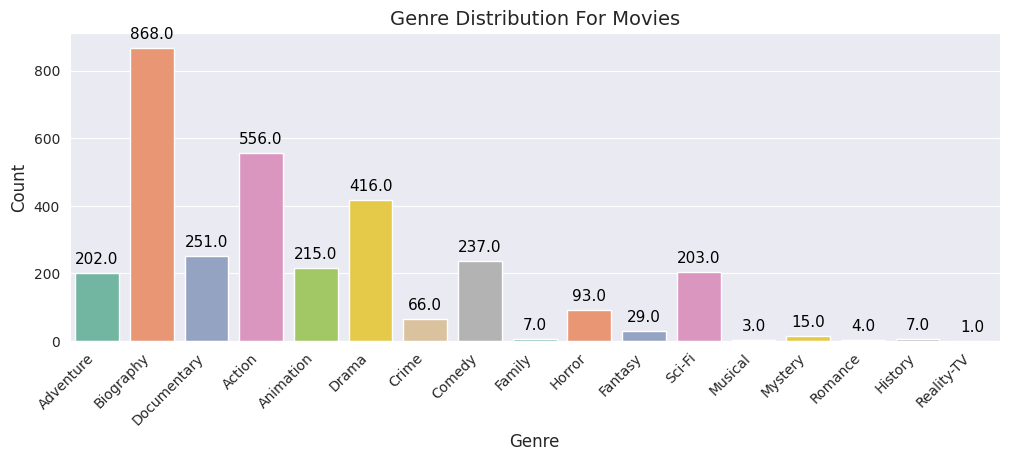

In [12]:
# Calculate percentages
total_count = len(IMDB_Movies_df)
class_counts = IMDB_Movies_df['Genre'].value_counts()
percentages = (class_counts / total_count) * 100

# Set the aesthetic style of the plots
sns.set_style("darkgrid")

# Create the figure and the axes
plt.figure(figsize=(12, 4))

# Plot the genre distribution with diagonal labels
ax = sns.countplot(x='Genre', data=IMDB_Movies_df, hue='Genre', palette='Set2', legend=False)
plt.xticks(rotation=45, ha='right')

# Add titles and labels
plt.title('Genre Distribution For Movies', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Annotate the bars with the count of each category
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 10),
                textcoords='offset points')

# Show the plot
plt.show()

<font color='Green'><h1><b>Interpretation of Genres for movies distribution<b></h1></font>

- Majority of the movies are based opn Biographies , which agrees with summary stats interpretation.
- Reality TV is the genre with the lowest amount of movies in IMDB

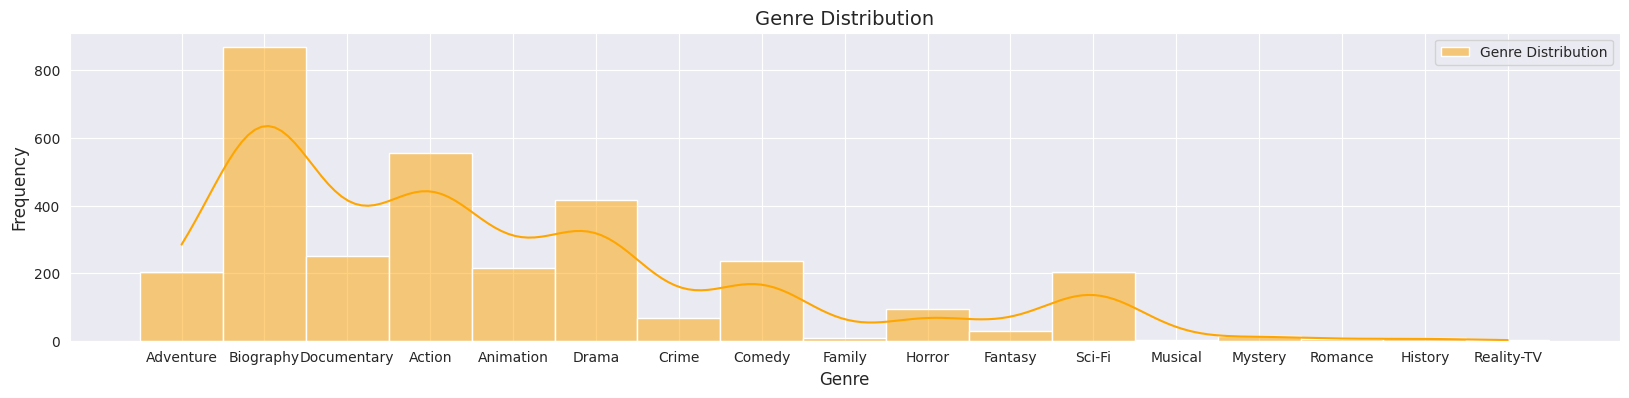

In [13]:
# Distribution by histogram
# Set the aesthetic style of the plots
sns.set_style("darkgrid")

# Create the figure and the axes
plt.figure(figsize=(20, 4))

# Plot the distribution of age
sns.histplot(IMDB_Movies_df['Genre'].dropna(), bins=130, kde=True, color='orange', label='Genre Distribution')

# Add titles and labels
plt.title('Genre Distribution', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add a vertical line for the mean age
mean_genre_count = class_counts.mean()

# Add a legend
plt.legend()

# Show the plot
plt.show()

<font color='Green'><h1><b>Interpretation of Genres for movies Histogram distribution<b></h1></font>

- Majority of the movies are based upon Biographies , which agrees with summary stats interpretation.
- Reality TV is the genre with the lowest amount of movies in IMDB

- Multimodal: The distribution has multiple  peaks, with the largest cluster arond Biography genre.

- Right-Skewed (Positively Skewed): The tail on the right side is longer than the tail on the right side . Because the distribution is slightly skewed, the mean is likely pulled slightly higher than the median

- Concentration around Biography genre: The peak of the distribution is around Biography genre, indicating that a large number of movies receive are Biography genre agreeing with summary stats.

<font color='56c3ea'><h1><b>3.2 Univariate Analysis: What do we know about IMDB ratings for movies?<b></h1></font>

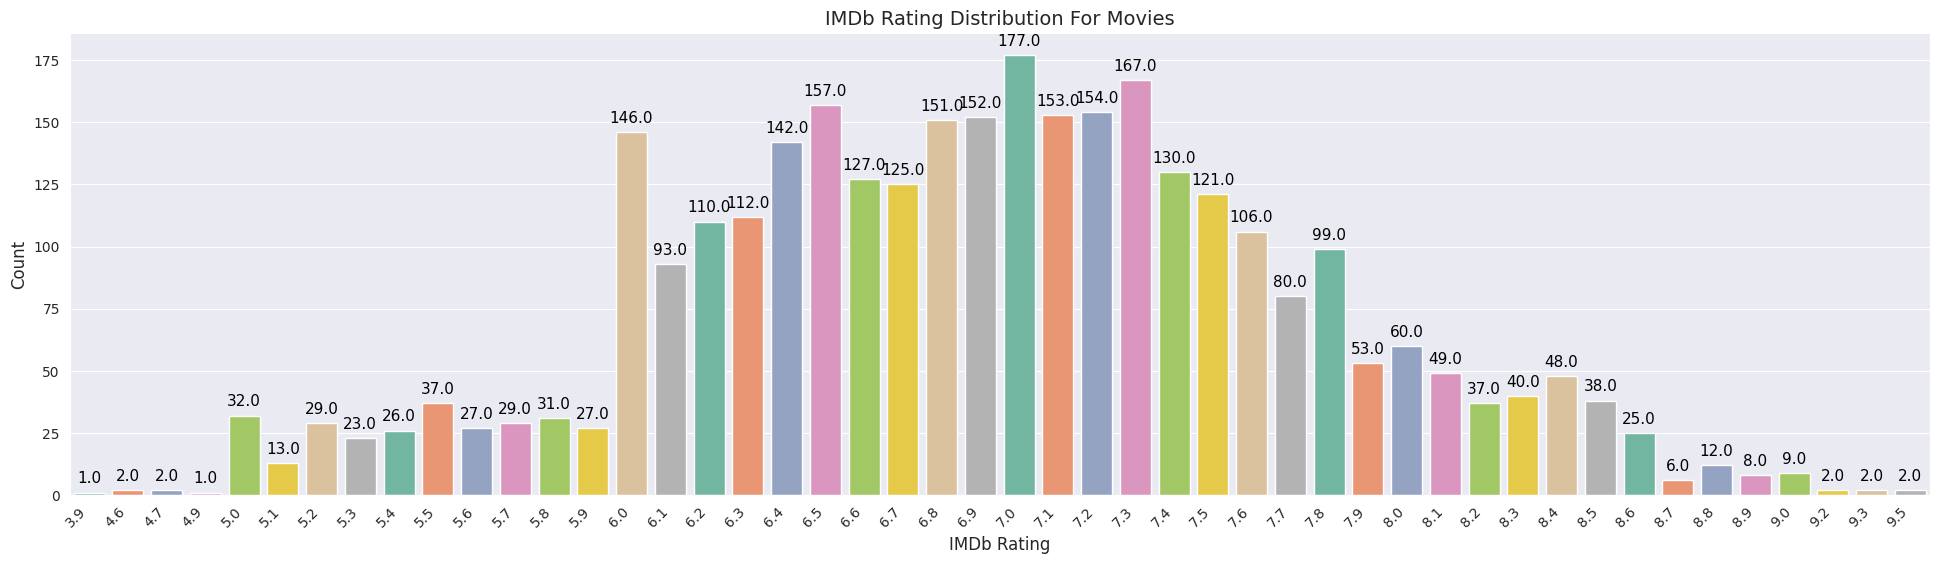

In [14]:
# Calculate percentages
total_count = len(IMDB_Movies_df)
class_counts = IMDB_Movies_df['IMDb Rating'].value_counts()
percentages = (class_counts / total_count) * 100

# Set the aesthetic style of the plots
sns.set_style("darkgrid")

# Create the figure and the axes
plt.figure(figsize=(24, 6))

# Plot the genre distribution with diagonal labels
ax = sns.countplot(x='IMDb Rating', data=IMDB_Movies_df, hue='IMDb Rating', palette='Set2', legend=False)
plt.xticks(rotation=45, ha='right')

# Add titles and labels
plt.title('IMDb Rating Distribution For Movies', fontsize=14)
plt.xlabel('IMDb Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Annotate the bars with the count of each category
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 10),
                textcoords='offset points')

# Show the plot
plt.show()

<font color='Green'><h1><b>Interpretation of IMDB Ratings for movies distribution<b></h1></font>

- The rating which appear in most movies in IMDB is 7 , which agrees to 6.9 average rating as shown in summary statistics
- The highest rating for a movie in IMDB is 9.5 while lowest if 3.9 which agrees with the summary stastistics

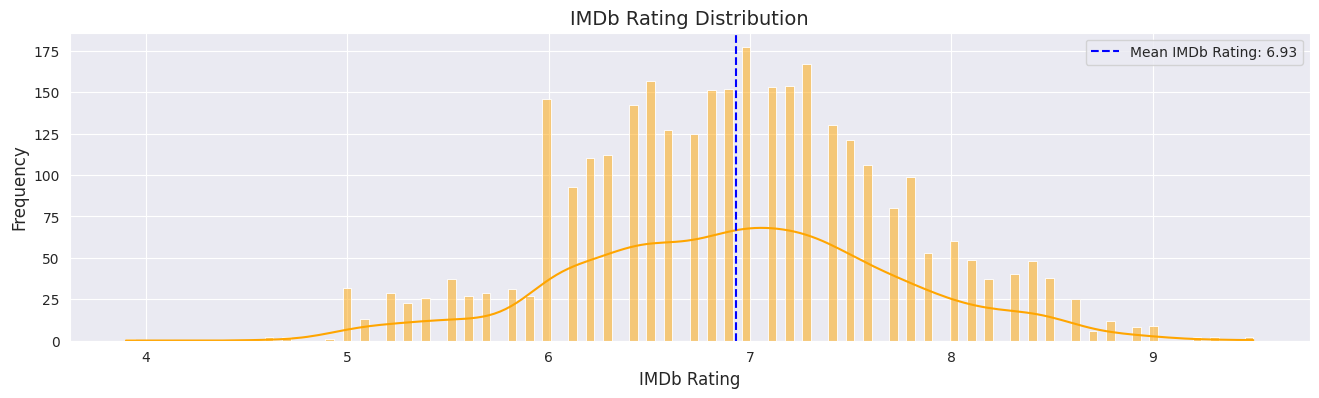

In [15]:
# Distribution by histogram
# Set the aesthetic style of the plots
sns.set_style("darkgrid")

# Create the figure and the axes
plt.figure(figsize=(16, 4))

# Plot the distribution of age
sns.histplot(IMDB_Movies_df['IMDb Rating'].dropna(), bins=130, kde=True, color='orange')

# Add titles and labels
plt.title('IMDb Rating Distribution', fontsize=14)
plt.xlabel('IMDb Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add a vertical line for the mean age
mean_IMDb_Rating = IMDB_Movies_df['IMDb Rating'].mean()
plt.axvline(mean_IMDb_Rating, color='blue', linestyle='--', linewidth=1.5, label=f'Mean IMDb Rating: {mean_IMDb_Rating:.2f}')

# Add a legend
plt.legend()

# Show the plot
plt.show()

<font color='Green'><h1><b>Interpretation of Rating Distribution by histogram<b></h1></font>

- Unimodal: The distribution has a single peak, indicating that there's a central tendency around which the ratings are clustered.

- Left-Skewed (Negatively Skewed): The tail on the left side (lower ratings) is longer than the tail on the right side (higher ratings). Because the distribution is slightly skewed, the mean (6.90) is likely pulled slightly lower than the median (the middle value)

- This suggests that there are more movies with ratings slightly below the mean than movies with ratings significantly above the mean.

- Concentration around 7: The peak of the distribution is around 7, indicating that a large number of movies receive ratings in this range.

- Range: The ratings range from approximately 4 to 9, suggesting a fairly broad spectrum of movie quality represented in the dataset.

<font color='56c3ea'><h1><b>3.3 Bivariate/Multivariate Analysis: How are different genres rated by the users?<b></h1></font>

In [16]:
# Group data by genre and calculate movie count and average rating
genre_stats = IMDB_Movies_df.groupby('Genre', observed=False).agg(
    movie_count=('Title', 'count'),  # Calculate the count of movies for each genre
    avg_rating=('IMDb Rating', 'mean')  # Calculate the average IMDb rating for each genre
).reset_index()  # Reset index to make 'Genre' a regular column

# Create an interactive scatter plot using plotly.express
fig = px.scatter(genre_stats,
                 x='movie_count',  # Set 'movie_count' as the x-axis
                 y='avg_rating',  # Set 'avg_rating' as the y-axis
                 color='Genre',  # Color points based on 'Genre'
                 hover_data=['Genre'],  # Display 'Genre' in tooltip on hover
                 title='Movie Count vs. Average IMDb Rating by Genre')  # Set plot title

# Display the interactive plot
fig.show()

<font color='Green'><h1><b>Interpretation of Movie Count againsts Ratings by Genre<b></h1></font>

- The genre with highest average rating is Documentary
- The genre with lowest average rating is Family
- Biography has the maximum movie count but does not have the highest avg rating
- Reality-TV has the lowest movie count but its average rating is second highest

<font color='56c3ea'><h1><b>3.4 Keyword trends: Whats the distribution of keywords over the years<b></h1></font>

- Extracting keywords from IMDB dataset and track their trends over time based on the tittle of the movie

<Figure size 1200x600 with 0 Axes>

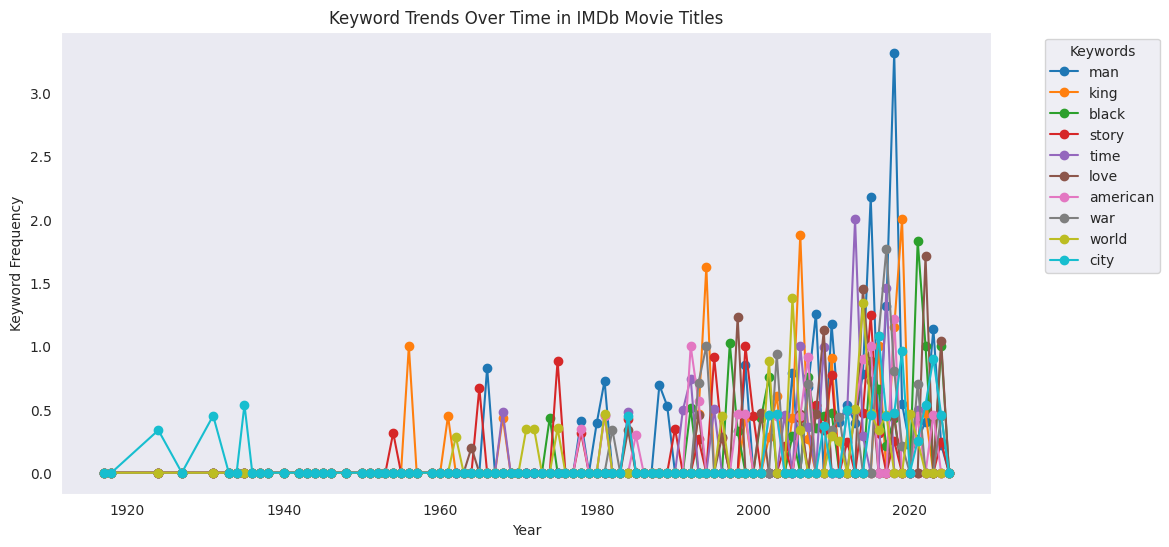

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

# Data preparation
IMDB_Movies_df.dropna(subset=['Year', 'Title'], inplace=True)  # Remove rows with missing year/title
IMDB_Movies_df['Year'] = IMDB_Movies_df['Year'].astype(int)  # Convert year to integer
text_data = IMDB_Movies_df['Title'].str.lower()  # Convert titles to lowercase

# Keyword extraction using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))  # Unigrams & Bigrams
tfidf_matrix = vectorizer.fit_transform(text_data)
feature_names = vectorizer.get_feature_names_out()

# Trend Analysis for yearly trends
yearly_trends = {}
for year in sorted(IMDB_Movies_df['Year'].unique()):  # Sort years for chronological order
    year_data = IMDB_Movies_df[IMDB_Movies_df['Year'] == year]['Title'].str.lower()
    if not year_data.empty:
        year_tfidf = vectorizer.transform(year_data)
        yearly_trends[year] = year_tfidf.sum(axis=0).A1  # Get keyword frequencies for the year

# Convert to DataFrame for easier analysis
trends_df = pd.DataFrame(yearly_trends, index=feature_names).T

# Select top keywords (e.g., those appearing frequently across years)
top_keywords = trends_df.sum().sort_values(ascending=False).head(10).index.tolist()
trends_df_filtered = trends_df[top_keywords]

# Plot keyword trends over time
plt.figure(figsize=(12, 6))
trends_df_filtered.plot(kind='line', marker='o', figsize=(12, 6), colormap='tab10')
plt.xlabel("Year")
plt.ylabel("Keyword Frequency")
plt.title("Keyword Trends Over Time in IMDb Movie Titles")
plt.legend(title="Keywords", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

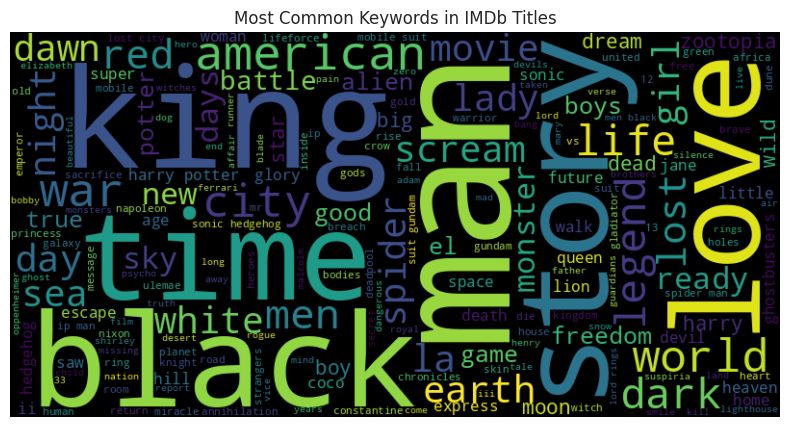

In [18]:
# Generate a word cloud for most common keywords
wordcloud = WordCloud(width=800, height=400, background_color="black").generate_from_frequencies(trends_df.sum())

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Keywords in IMDb Titles")
plt.show()

<font color='Green'><h1><b>Interpretation of Keyword Trends over time<b></h1></font>

- From keyword trend analysis above the word which stand out the most is story ,black , king , american and man all these words show spike around the year 2020.

- This is contributed by the recent social and political themes.

<font color='56c3ea'><h1><b>4 Data Preprocessing & Feature Engineering<b></h1></font>

<font color='56c3ea'><h1><b>4.1 Treating Missing Values<b></h1></font>

In [19]:
## Dropping Columns with Many Missing Values
# RULE OF THUMB
# if missing values count is > 70% of the data delete the attribute

def get_columns_to_drop(data, threshold=70):
  """Identifies columns with more than a specified percentage of missing values.

  Args:
    data: The input Pandas DataFrame.
    threshold: The percentage threshold for missing values (default is 70).

  Returns:
    A list of column names to drop.
  """

  # Calculate missing values percentage for each column
  missing_values_percentage = (data.isnull().sum() / len(data)) * 100

  # Filter columns exceeding the threshold
  columns_to_drop = missing_values_percentage[missing_values_percentage > threshold].index.tolist()

  # Return columns
  if len(columns_to_drop) > 0:
    return columns_to_drop

  return f'All columns exceeds The percentage threshold({threshold}%) for missing values, no column to drop'

In [20]:
# call function to analyse columns to drop
columns_to_drop = get_columns_to_drop(IMDB_Movies_df)
print(columns_to_drop)

All columns exceeds The percentage threshold(70%) for missing values, no column to drop


<font color='Green'><h1><b>Observations/Key Insight<b></h1></font>



<p>No missing values found , because All columns exceeds The percentage threshold(70%) for missing values, no column to drop.

<font color='56c3ea'><h1><b>4.2 Dropping unnecessary columns<b></h1></font>

- For the AI Assistant that we are building , Poster-src column will not be needed because it doesnt contribute much to the insights to be given to the users, so its going to be dropped

In [21]:
## Drop the above columns
## Due to above reasons, below columns are going to be dropped
print(f'Columsn before dropping {IMDB_Movies_df.shape[1]}\n')

unnecessary_columns = ['Poster-src']
IMDB_Movies_df = IMDB_Movies_df.drop(columns=unnecessary_columns)

print(f'\nColumsn after dropping {IMDB_Movies_df.shape[1]}')

Columsn before dropping 10


Columsn after dropping 9


In [22]:
# Verifying columns
IMDB_Movies_df.head()

,Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Duration (minutes)
0,End of the Spear,6.8,2005,PG-13,Adventure,Jim Hanon,Louie LeonardoChad AllenJack Guzman,45.0,108.0
1,Elvira Madigan,7.0,1967,PG,Biography,Bo Widerberg,Pia DegermarkThommy BerggrenLennart Malmer,66.0,91.0
2,The Kid Stays in the Picture,7.3,2002,R,Documentary,Nanette Burstein,Robert EvansEddie AlbertPeter Bart,75.0,93.0
3,It Ain't Over,8.2,2022,PG,Documentary,Sean Mullin,Andy AndresRoger AngellMarty Appel,79.0,99.0
4,Mahler,7.0,1974,PG,Biography,Ken Russell,Robert PowellGeorgina HaleLee Montague,66.0,115.0


<font color='Green'><h1><b>Observations from Removing unnecessaty columns<b></h1></font>

Poster-src got dropped successfully

<font color='56c3ea'><h1><b>4.3 Data type conversion<b></h1></font>

For memory optimization and better performance columns of datatype objects will be converted to caregorical data types

In [23]:
# checking dataframe structure
IMDB_Movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3173 entries, 0 to 3172
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               3173 non-null   object 
 1   IMDb Rating         3173 non-null   float64
 2   Year                3173 non-null   int64  
 3   Certificates        3173 non-null   object 
 4   Genre               3173 non-null   object 
 5   Director            3173 non-null   object 
 6   Star Cast           3173 non-null   object 
 7   MetaScore           3173 non-null   float64
 8   Duration (minutes)  3173 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 223.2+ KB


In [24]:
# identifying object columns
object_columns = IMDB_Movies_df.select_dtypes(include='object').columns.tolist()
print(object_columns)

['Title', 'Certificates', 'Genre', 'Director', 'Star Cast']


In [25]:
# converting object clumns to categorical
object_columns = IMDB_Movies_df.select_dtypes(include='object').columns.tolist()

# convert object_columns to categorical
IMDB_Movies_df[object_columns] = IMDB_Movies_df[object_columns].astype('category')

In [26]:
# checking for newly converted datatypes
IMDB_Movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3173 entries, 0 to 3172
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Title               3173 non-null   category
 1   IMDb Rating         3173 non-null   float64 
 2   Year                3173 non-null   int64   
 3   Certificates        3173 non-null   category
 4   Genre               3173 non-null   category
 5   Director            3173 non-null   category
 6   Star Cast           3173 non-null   category
 7   MetaScore           3173 non-null   float64 
 8   Duration (minutes)  3173 non-null   float64 
dtypes: category(5), float64(3), int64(1)
memory usage: 377.0 KB


<font color='56c3ea'><h1><b>4.4 Removing Duplicates<b></h1></font>

In [27]:
# Check for duplicates
IMDB_Movies_df_duplicates = IMDB_Movies_df.duplicated().sum()
print(f"Number of duplicate rows: {IMDB_Movies_df_duplicates}")

Number of duplicate rows: 411


In [28]:
print(f"Rows before removing duplicates {IMDB_Movies_df.shape[0]}")

Rows before removing duplicates 3173


In [29]:
# found 411 duplicates , removing them
IMDB_Movies_df = IMDB_Movies_df.drop_duplicates()

In [30]:
print(f"Rows After removing duplicates {IMDB_Movies_df.shape[0]}")

Rows After removing duplicates 2762


<font color='Green'><h1><b>Observations for Duplicates<b></h1></font>

411 Duplicate rows have been removed from the datasets , remaining with 2762 total rows as shown above

<font color='56c3ea'><h1><b>4.5 Cleaning movie title<b></h1></font>

Movie title may contain special characters which are not needed by LLM for NLP taks. Removing everything and remaining with characters only will enhance input fed to LLM

In [31]:
# checking for titles
IMDB_Movies_df['Title']

,Title
0,End of the Spear
1,Elvira Madigan
2,The Kid Stays in the Picture
3,It Ain't Over
4,Mahler
...,...
3166,The Godfather Part II
3167,12 Angry Men
3170,The Dark Knight
3171,The Godfather


In [ ]:
# fiter everything matching characters and speces

IMDB_Movies_df['Title'] = IMDB_Movies_df['Title'].astype(str).str.replace(r"[^a-zA-Z ]", "", regex=True)

In [33]:
IMDB_Movies_df['Title']

,Title
0,End of the Spear
1,Elvira Madigan
2,The Kid Stays in the Picture
3,It Aint Over
4,Mahler
...,...
3166,The Godfather Part II
3167,Angry Men
3170,The Dark Knight
3171,The Godfather


<font color='56c3ea'><h1><b>4.6 Constructing Text Data<b></h1></font>

Its useful to use all details from 'Title', 'IMDb Rating', 'Year', 'Certificates', 'Genre', 'Director', 'Star Cast', 'MetaScore'and 'Duration (minutes) so that we can provide detailed context to the models to have a deep understanding of the movie to provide a good interactive experience to the users.

In [34]:
column_list = IMDB_Movies_df.columns.to_list()
print(f'List of columns : {column_list}')

List of columns : ['Title', 'IMDb Rating', 'Year', 'Certificates', 'Genre', 'Director', 'Star Cast', 'MetaScore', 'Duration (minutes)']


In [35]:
# Function to check if column is valid(Not a number or its not missing)
def check_column_validity(movie_row):
  # initialize empty movie
  movie = ""
  for column_name in column_list:
    # Extracting column content
    column_content = row[1][column_name]
    # Check validity
    if not isinstance(column_content, (int, float)) or not np.isnan(column_content):
      movie += f"{column_name}: {column_content}\n"
  return movie


In [36]:
# Text data
# Empty lists to save product descriptions and their lengths

movie_descriptions = []
movie_descriptions_len = []

# Going through each row in a dataframe
for row in IMDB_Movies_df.iterrows():
  # print(check_column_validity(row))
  movie = check_column_validity(row)

  movie = movie.strip() # Remove any leading/trailing whitespace
  movie_descriptions.append(movie) # Add the formatted product details to the list
  movie_descriptions_len.append(len(movie)) # Storing length of product description

In [37]:
# Checking number of movies
print(f'Number of movies {len(movie_descriptions)}')

Number of movies 2762


In [ ]:
# Checking a sample movie
print(movie_descriptions[-1])

In [ ]:
print(movie_descriptions)

<font color='56c3ea'><h1><b>4.7 Vectorizing Text<b></h1></font>

In [40]:
# Splitting movie descriptions into chunks using Recursive character chunking

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=250,
    chunk_overlap=20,
    length_function=len,
    is_separator_regex=False,
)

movie_documents = text_splitter.create_documents(movie_descriptions)

In [ ]:
# Store your OpenAI API key
OPENAI_API_KEY = getpass.getpass("Enter your open API key")

In [42]:
# Converting chunks/movie documents into embedding and keep them in a vector store
embeddings = OpenAIEmbeddings(openai_api_key=OPENAI_API_KEY)

# Create a vector store using the created chunks and the embeddings model
vector = FAISS.from_documents(movie_documents, embeddings)

<font color='56c3ea'><h1><b>5 Model Implementation<b></h1></font>

<font color='56c3ea'><h1><b>5.1 Using GPT API for chatbot interactions<b></h1></font>

In [43]:
# Initializing the ChatOpenAI model to interact with OpenAI's GPT model.
llm = ChatOpenAI(api_key=OPENAI_API_KEY, model = 'gpt-4o-mini')

In [44]:
# Importing the output parser to process and format the model's response into a readable string format.
output_parser = StrOutputParser()

# Creating a prompt template that instructs the AI to act as a customer service agent.
# The prompt takes two parameters:
#   1. {context} - Relevant information retrieved from the document store.
#   2. {input} - The user's question.
# The model is instructed to base its answer solely on the provided context.
prompt = ChatPromptTemplate.from_template(
    """Answer the following question based only on the provided context:

    <context>
    {context}
    </context>

    Question: {input}""",
    output_parser=output_parser  # The output parser ensures that the response is returned in a structured string format.
)

# Creating a document processing chain using the LLM and the defined prompt template.
# This chain takes a list of retrieved documents and passes them as context to the model for generating responses.
# document_chain = create_stuff_documents_chain(llm, prompt)
document_chain = prompt | llm

<font color='56c3ea'><h1><b>5.2 Retrieving movie details efficiently with FAISS/Vector Search.<b></h1></font>

In [45]:
# Create a retriever from the vector store for fetching relevant documents
# Vector is the vector store created earlier
retriever = vector.as_retriever()

# Create a retrieval chain that first retrieves relevant documents and then processes them using the document chain
retrieval_chain = create_retrieval_chain(retriever, document_chain)

In [46]:
# # Invoking the retrieval chain to test retrieving movie details.
# retrieval_chain.invoke({"input": "who are the top actors?"})

In [47]:
# # Invoking the retrieval chain to test retrieving movie details.
# retrieval_chain.invoke({"input": "What are some of the best movies and why?"})

In [ ]:
# Invoking the retrieval chain to test retrieving movie details.
retrieval_chain.invoke({"input": "What's the total number of movies?"})

<font color='56c3ea'><h1><b>6 Chatbot Interface<b></h1></font>

<font color='56c3ea'><h1><b>6.1 Formatting response<b></h1></font>

In [49]:
# Creating an instance of the OpenAI client using the provided API key
openai_client = OpenAI(api_key=OPENAI_API_KEY)

# Function to process the user query return the response in a readable format using LLM client
def imdb_movie_dataset_search_final_response(user_query):
    # Invoking the retrieval chain with the user's query to fetch relevant product information
    response = retrieval_chain.invoke({"input": user_query})['answer']

    # Creating a prompt to instruct the AI to format the response properly
    prompt = f"""
    Format the responses properly in {response} .Just return the movie related
    details in a human readable format(bulet points , well structured sentences or
    paragraphs only ) only texts no other characters.

    example output 1:

    - The movie with the highest IMDb rating is Inglourious Basterds.
    - Its current IMDb rating is 8.4.

    example output 2:

    1. Why We Fight (2005)
      - IMDb Rating: 8.0
      - This documentary, directed by Eugene Jarecki, addresses the military-industrial complex and its implications on society. Its strong rating

    """

    # Sending the formatted prompt to the GPT-4o-mini model for processing
    # openai_response = client.chat.completions.create(
    openai_response = openai_client.chat.completions.create(
        model='gpt-4o-mini',  # Using GPT-4o-mini model for response generation
        messages=[{'role': 'user', 'content': prompt}]  # Providing the prompt to the model
    )

    # Extracting and returning the AI-generated response
    return openai_response.choices[0].message.content

In [ ]:
# Invoking the retrieval chain to test retrieving movie details.
print(imdb_movie_dataset_search_final_response("What's the movie with highest IMDB rating?"))

In [ ]:
# Invoking the retrieval chain to test retrieving movie details.
print(imdb_movie_dataset_search_final_response("What are some of the best movie and why?"))

<font color='56c3ea'><h1><b>6.2 Interactive UI (Gradio) for users to input queries<b></h1></font>

In [ ]:
# Creating the Gradio interface for the product recommendation system
app = gr.Interface(
    fn=imdb_movie_dataset_search_final_response,        # The function that processes user input and returns recommendations
    inputs="text",            # Input component: a text box for users to enter their query
    outputs="text",           # Output component: a text box to display the AI-generated response
    title="IMBD Movie Chatbot",     # The title of the web interface
    description="Type your question below to get the recommendations",
    theme="Ocean",
    allow_flagging="never"    # Disabling the flagging feature to remove the "Flag" button
)

# Launching the Gradio app to start the interface and make it accessible via web browser
app.launch()

<font color='56c3ea'><h1><b>7 Evaluation & Future Work<b></h1></font>

<font color='56c3ea'><h1><b>7.1 Performance analysis<b></h1></font>

In [53]:
# Setting up langsmith
LANGSMITH_TRACING=True
LANGSMITH_PROJECT="IMDB-movie-chatbot"

In [54]:
# Store your  langsmith API key
LANGSMITH_API_KEY = getpass.getpass("Enter your Langsmith API key")

Enter your Langsmith API key··········


In [ ]:
# 1.Creating dataset
# For test cases below code creates dataset(question and answers) of test cases
# using client and upload them to langsmith using client

langsmith_client = Client(api_key=LANGSMITH_API_KEY)

# Define dataset: test cases
dataset_name = "IMDB Movie questions and answers"
dataset = langsmith_client.create_dataset(dataset_name)
langsmith_client.create_examples(
    dataset_id=dataset.id,
    examples=[
        {
            "inputs": {"question": "What's the total number of movies?"},
            "outputs": {"answer": "The total number of movies in the provided context is 4"},
        },
        {
            "inputs": {"question": "What's the movie with highest IMDB rating?"},
            "outputs": {"answer": "The movie with the highest IMDb rating is Inglourious Basterds. - Its current IMDb rating is 8.4"},
        }
    ]
)

In [57]:
# 2.Defining metrics - correctness , short and concise
# Using LLM as a judge to determine weather output is correct or not by calling
# openai client

import openai
from langsmith import wrappers

# openai_client = wrappers.wrap_openai(openai.OpenAI())

eval_instructions = "You are an expert professor specialized in grading customers' answers to movie questions."

def correctness(inputs: dict, outputs: dict, reference_outputs: dict) -> bool:
    user_content = f"""You are grading the following question:
{inputs['question']}
Here is the real answer:
{reference_outputs['answer']}
You are grading the following predicted answer:
{outputs['response']}
Respond with CORRECT or INCORRECT:
Grade:
"""
    # response = openai_client.chat.completions.create(
    response = openai_client.chat.completions.create(
        model="gpt-4o-mini",
        temperature=0,
        messages=[
            {"role": "system", "content": eval_instructions},
            {"role": "user", "content": user_content},
        ],
    ).choices[0].message.content
    return response == "CORRECT"

In [58]:
# 3.Running Evaluations

# this function return output from final response as a key value pair that client.evaluate
# can understand
def ls_target(inputs: str) -> dict:
    return {"response": imdb_movie_dataset_search_final_response(inputs["question"])}

In [ ]:
# Evaluations
experiment_results = langsmith_client.evaluate(
    ls_target, # Chatbot's final response
    data=dataset_name, # The data to predict and grade over
    evaluators=[ correctness], # The evaluators to score the results
    experiment_prefix="IMDB-Movie-Chatbot-Results", # A prefix for your experiment names to easily identify them
)

<font color='56c3ea'><h1><b>7.2 Agentic Architecture<b></h1></font>

In [60]:
# Store your  Google Custom Search JSON API key
Google_Custom_Search_JSON_API_key = getpass.getpass("Enter your Google Custom Search JSON API key")

Enter your Google Custom Search JSON API key··········


In [61]:
# Store your Google Custom Search ID
google_CX_ID = getpass.getpass("Enter your Google Custom Search ID")

Enter your Google Custom Search ID··········


In [62]:

# Function to process response to a readable format using LLM client
def format_response(response):

    # Creating a prompt to instruct the AI to format the response properly
    prompt = f"""
    Format the responses properly in {response} .Just return the movie related
    details in a human readable format(bulet points , well structured sentences or
    paragraphs only ) only texts no other characters.

    example output 1:

    - The movie with the highest IMDb rating is Inglourious Basterds.
    - Its current IMDb rating is 8.4.

    example output 2:

    1. Why We Fight (2005)
      - IMDb Rating: 8.0
      - This documentary, directed by Eugene Jarecki, addresses the military-industrial complex and its implications on society. Its strong rating

    example output 3:
    The trending movies are
    1.Antiman
    2.Aquaman
    3.Mission impossible

    """

    # Sending the formatted prompt to the GPT-4o-mini model for processing
    # openai_response = client.chat.completions.create(
    openai_response = openai_client.chat.completions.create(
        model='gpt-4o-mini',  # Using GPT-4o-mini model for response generation
        messages=[{'role': 'user', 'content': prompt}]  # Providing the prompt to the model
    )

    # Extracting and returning the AI-generated response
    return openai_response.choices[0].message.content

In [67]:
# Define various agents - each performing a particular task using tool decorator
# Tool for searching the internet for trending movies
# Using Google Custom Search JSON API

@tool
def get_trending_movies(user_query="What are top 10 movies trending today in year 2025") -> str:
  """Retrieves top 10 trending movies from the internet"""
  # --- Configuration ---
  query = user_query

  # base URL for the Google Custom Search API
  base_url = "https://www.googleapis.com/customsearch/v1"

  # Parameters for the API request
  # 'key': Your API Key
  # 'cx': Your Search Engine ID
  # 'q': Your search query
  params = {
      "key": Google_Custom_Search_JSON_API_key,
      "cx": google_CX_ID,
      "q": query,
      "num": 1 # limiting results to 1 to get the best result
  }

  try:
    # Send a GET request to the API
    response = requests.get(base_url, params=params)

    # Raise an exception if the request returned an HTTP error code (4xx or 5xx)
    response.raise_for_status()

    # --- Process the JSON Response ---
    # Parse the JSON response from the API
    search_results_data = response.json()

    # Check if 'items' key exists in the response, which contains the search results
    if 'items' in search_results_data and search_results_data['items']:
        # Get the first search result item (since you're limiting to 1)
        item = search_results_data['items'][0]
        title = item.get('title')       # Get the title of the search result
        link = item.get('link')         # Get the URL of the search result
        snippet = item.get('snippet')   # Get the description snippet
        display_link = item.get('displayLink') # Get the display URL

        # Return the results
        # return {
        #       "Title": title,
        #       "Link": link,
        #       "Display Link": display_link,
        #       "Snippet": snippet.strip()
        #   }

        # Extracting content from the link
        bs_response = requests.get(link)
        bs_response.raise_for_status() # raise an exception if HTTP error code

        page_results = BeautifulSoup(bs_response.content , "html.parser")

        text = format_response(page_results.get_text())

        # print(f"resp_text: {text}")

        return {"top 10 movies" : {text}} # This text will be sent to LLM

    else:
        return "No results found for your query."

  except requests.exceptions.HTTPError as http_err:
      return f"HTTP error occurred: {http_err}"
  except Exception as err:
      return f"An error occurred: {err}"

In [68]:
# Tool to search movies from IMDB dataset provided
@tool
def IMDB_dataset_search_tool(user_query:str) -> str:
  """Search for movie details from the IMDB dataset with their details which include
  Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Duration (minutes)"""

  # Initializing the ChatOpenAI model to interact with OpenAI's GPT model.
  llm = ChatOpenAI(api_key=OPENAI_API_KEY, model = 'gpt-4o-mini')

  # Importing the output parser to process and format the model's response into a readable string format.
  output_parser = StrOutputParser()

  # Creating a prompt template
  prompt = ChatPromptTemplate.from_template(
      """Answer the following question based only on the provided context:

      <context>
      {context}
      </context>

      Question: {input}""",
      output_parser=output_parser  # The output parser ensures that the response is returned in a structured string format.
  )

  # Creating a document processing chain using the LLM and the defined prompt template.
  document_chain = prompt | llm

  # Create a retriever from the vector store for fetching relevant documents
  # Vector is the vector store created earlier
  retriever = vector.as_retriever()

  # Create a retrieval chain that first retrieves relevant documents using FAISS and then processes them using the document chain
  retrieval_chain = create_retrieval_chain(retriever, document_chain)

  # Invoking the retrieval chain to test retrieving movie details.
  query_results = format_response(retrieval_chain.invoke({"input": user_query}))

  return query_results

In [69]:
# List of available tools
tools = [get_trending_movies , IMDB_dataset_search_tool]

# Render tool descriptions for AI understanding
# rendered_tools = render_text_description(tools)

In [ ]:
from langgraph.graph import StateGraph, END
from langchain.chat_models import ChatOpenAI
from langchain.agents import Tool, initialize_agent
from langchain.agents.agent_types import AgentType
from typing import Dict, Any
from pydantic import BaseModel

# Initialize the agent
llm = ChatOpenAI(
    model="gpt-4o-mini",
    temperature=0,
    openai_api_key=OPENAI_API_KEY
    )
agent = initialize_agent(tools, llm, agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION)

# Define the agent function
def agent_node(state: Dict[str, Any]) -> Dict[str, Any]:
    input_text = state.input
    result = agent.run(input_text)
    return {"output": result}

# Build the graph
# Specify input and output types for the state schema
class InputSchema(BaseModel):
    input: str

class OutputSchema(BaseModel):
    output: str

graph = StateGraph(
    input=InputSchema,
    output=OutputSchema,
)

graph.add_node("agent", agent_node)
# Swap the following two lines:
graph.set_entry_point("agent")  # Start from the "agent" node
graph.set_finish_point("agent")  # Finish at the END node

# Compile the graph
imdb_movie_chatbot = graph.compile()

# Run the graph with different inputs
# input_texts = [
#     "what are the movie trends"
# ]

# input_texts = [
#     # "what best movies from imdb and why"
#     "what the movie with highest rating"
# ]

input_texts = [
    "what are the movie trends",
    "what the movie with highest rating"
]

for text in input_texts:
    result = imdb_movie_chatbot.invoke({"input": text})
    print(f"Input: {text}\nOutput: {result['output']}\n")

In [ ]:
# Gradio function to call the chatbot
def chat_interface(message, history):
    result = imdb_movie_chatbot.invoke({"input": message})
    return result["output"]

# Gradio chat interface
chat_ui = gr.ChatInterface(fn=chat_interface, title="IMDB Movie Chatbot")

# Launch the interface
chat_ui.launch()

<font color='56c3ea'><h1><b>1 Problem Statement<b></h1></font>

In [ ]:
# do a cloud word on the columns with texts datasets
# feature engineering in this context is to cnvers the datasets to embeddings

In [ ]:
# Create movie description for each movie from the details provided in the dataset
# Convert each row to a single entry, 9 entries - poster source exluded

In [ ]:
# Now, data is ready!
# Its time to create your vector store
# Perform Text Chunking

In [ ]:
# Create embeddings for the chunks
# See https://python.langchain.com/docs/integrations/text_embedding/ for a list of available embedding models on LangChain

In [ ]:
# Create a vector store using the created chunks and the embeddings model


In [ ]:
# Create the llm model


In [ ]:
# Create the prompt template

In [ ]:
# Create the document processing chain

In [ ]:
# Create a retriever from the vector store for fetching relevant documents
# See https://python.langchain.com/v0.1/docs/modules/data_connection/retrievers/vectorstore/
# when creating retreiver
# as_retreiver(search_type="mmr") or similarity

In [ ]:
# Invoke the retrieval chain to process the user's query
# You can also try context training

In [ ]:
# Perform adequate formatting to print the final response in a user readable format

In [ ]:
# Optional: Test the functionality using a Gradio UI (intermediate check)

In [ ]:
# Define various agents - each performing a particular task using tool decorator

In [ ]:
# Define the orchestrator logic to run the agents appropriately

In [ ]:
# Check the edge cases and handle them appropriately

In [ ]:
# Create a UI using gradio or any other tool of your choice

# Test the performance of your bot with various test cases and refine your code!
